# <center>PR 4</center>
# <center>Spread Locator</center>

In [ ]:
"""

    1. What is Statistical Distributions?
    -> A way to show how values of data are spread out and how likely each value is.

    2. What is a Q-Q Plot and why is it used?
    -> A graph used to check if data follows a certain distribution (like normal).

    3. Difference between Discrete and Continuous Distributions.
    -> Discrete counts whole numbers; continuous measures values with decimals.

    4. What is Bernoulli Distribution?
    -> A distribution with only two outcomes (yes/no, 0/1).

    5. What is Binomial Distribution?
    -> Counts how many successes happen in several yes/no trials.

    6. Explain Log-Normal Distribution.
    -> A distribution where values are positive and right-skewed.

    7. Explain Power Law Distribution.
    -> A distribution where small values are common and very large values are rare but possible.

    8. What is Box-Cox Transform?
    -> A method to make data more normal-looking.

    9. Explain Poisson Distribution with an example.
    -> A distribution used to count events happening in a fixed time or space.

    10. What is Z-score Probability?
    -> he chance of a value based on how far it is from the average.

    11 .Differentiate Probability Density Function (PDF) and Cumulative
    Distribution Function (CDF).
    -> PDF shows how dense values are; CDF shows total probability up to a value.

"""

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('spread_locator_dataset.csv')
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.head()

,transaction_id,customer_id,transaction_amount,transaction_date,transaction_count,region,transaction_status
0,e98aa092-3770-4fdb-9502-5b5a6a244811,CUST2824,3821.34,2023-01-26,3,North,Fail
1,11ba6918-dba0-41e5-96cf-f5a7b95f0103,CUST1409,2781.84,2023-01-28,0,East,Fail
2,82b7654b-6eb7-4579-89a0-1a9edec0a7bb,CUST5506,4120.97,2023-01-28,0,South,Fail
3,f7166574-f400-4d53-b526-0b11f6619ddf,CUST5012,6383.78,2023-01-18,2,South,Success
4,8632fe26-b507-4068-9c68-1b2fa04fecb3,CUST4657,2651.61,2023-01-04,4,North,Success


In [7]:
success_prob = (df['transaction_status']=='Success').mean()
print(f'Success Probability: {success_prob}')

fail_prob = (df['transaction_status']=='Fail').mean()
print(f'Fail Probability: {fail_prob}')


Success Probability: 0.44545454545454544
Fail Probability: 0.5545454545454546


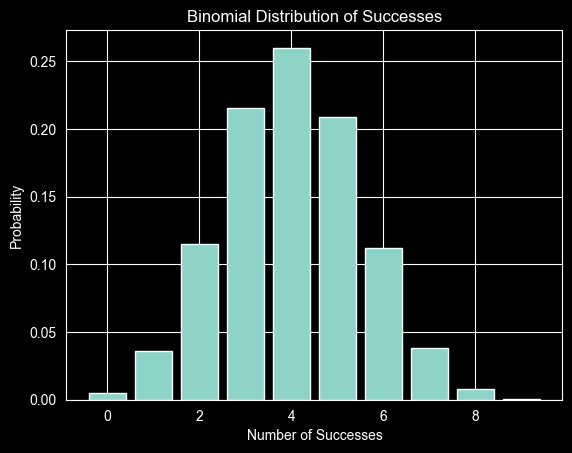

In [12]:
n = df['transaction_count'].max()
x = np.arange(0,n+1)
bino = stats.binom.pmf(x,n,success_prob)
plt.bar(x, bino)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Successes')
plt.show()

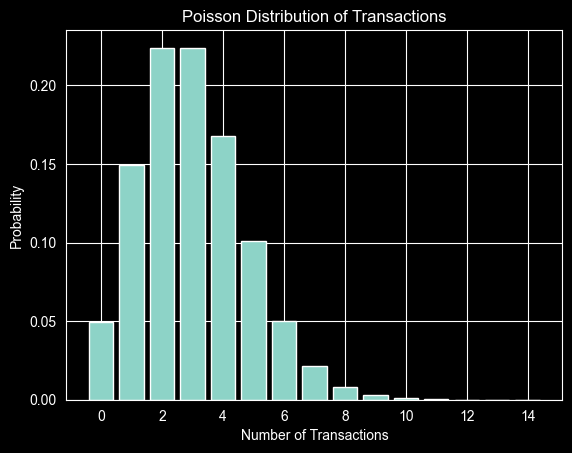

In [32]:
lambda_val = df['transaction_count'].mean().round()
x = np.arange(0,15)

poisson_pmf = stats.poisson.pmf(x,lambda_val)
plt.bar(x, poisson_pmf)
plt.title('Poisson Distribution of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Probability')
plt.show()

In [33]:
amount = df['transaction_amount']

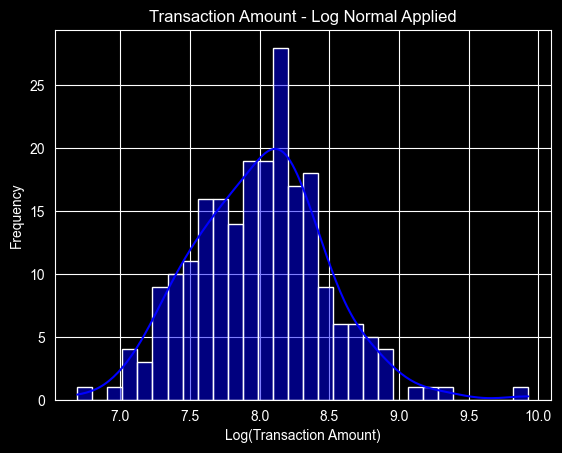

In [55]:
log_normal = np.log(amount)

sns.histplot(log_normal, bins=30, color='blue', kde=True)
plt.title('Transaction Amount - Log Normal Applied')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Frequency')
plt.show()

In [56]:
amount_box_cox, lambda_val = stats.boxcox(amount)
print(f'Lamda Value: {lambda_val}')
amount_box_cox[:5]

Lamda Value: -0.18083390743966327


array([4.28561065, 4.21207995, 4.30248114, 4.39588421, 4.20060422])

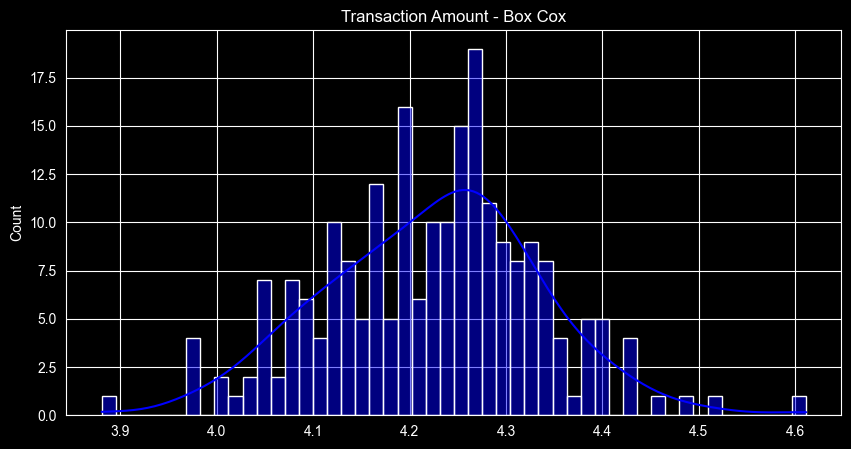

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(amount_box_cox, bins=50, color='blue', kde=True)
plt.title('Transaction Amount - Box Cox')
plt.show()

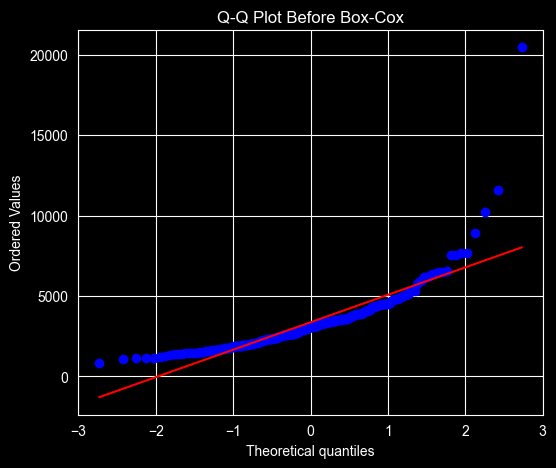

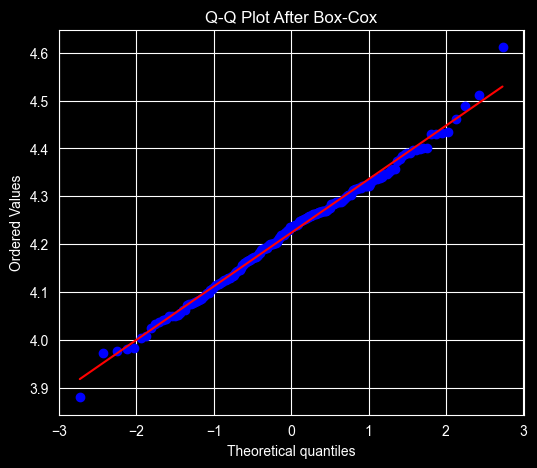

In [60]:

plt.show()
plt.figure(figsize=(6, 5))
stats.probplot(df["transaction_amount"], dist="norm", plot=plt)
plt.title("Q-Q Plot Before Box-Cox")
plt.show()

plt.figure(figsize=(6, 5))
stats.probplot(amount_box_cox, dist="norm", plot=plt)
plt.title("Q-Q Plot After Box-Cox")
plt.show()


In [64]:
mean = amount.mean()
std = amount.std()
z = (5000 - mean) / std
print(f"Z-score: {z:.2f}")

prob = 1 - stats.norm.cdf(z)
print(f"Probability of a transaction > $5000: {prob:.2%}")


Z-score: 0.82
Probability of a transaction > $5000: 20.52%


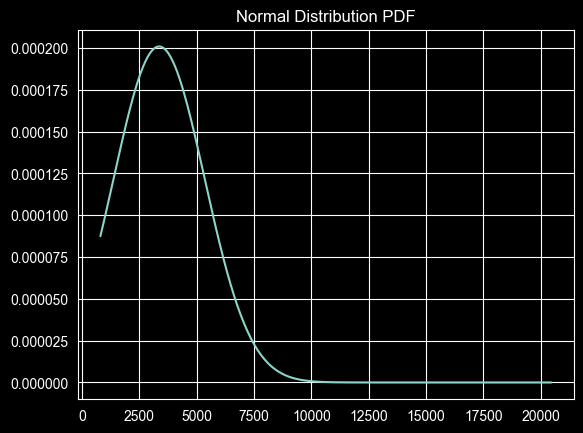

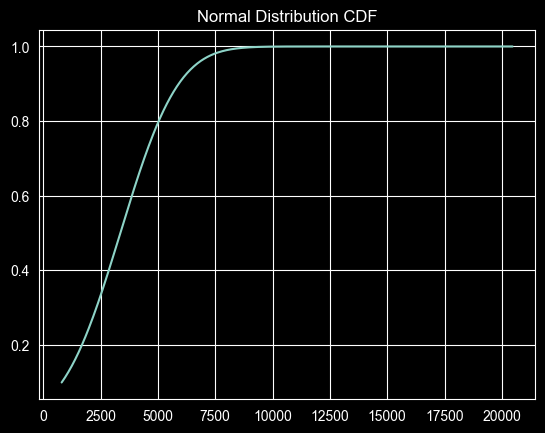

In [66]:

x = np.linspace(amount.min(), amount.max(), 400)

pdf = stats.norm.pdf(x, mean, std)
plt.figure()
plt.plot(x, pdf)
plt.title("Normal Distribution PDF")
plt.show()

cdf = stats.norm.cdf(x, mean, std)
plt.figure()
plt.plot(x, cdf)
plt.title("Normal Distribution CDF")
plt.show()